The main goal of this problem is to find which features of these kinds of wine are the ones that provide the most information about its quality. We will also try to make a prediction of a wine's quality and check if it matches with the real quality.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

The red wine industry shows a recent exponential growth as social drinking is on the rise. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. A vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to red wine quality.

In [2]:
redwine = pd.read_csv("winequality-red.csv")
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
662,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.9972,3.36,0.7,9.6,6


In [3]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Simple EDA

In [5]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='density', ylabel='alcohol'>

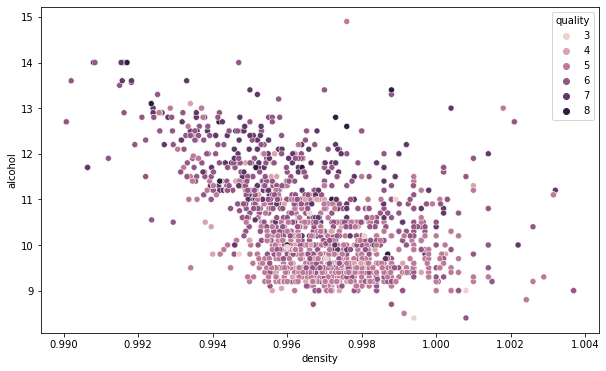

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data= redwine, hue='quality')

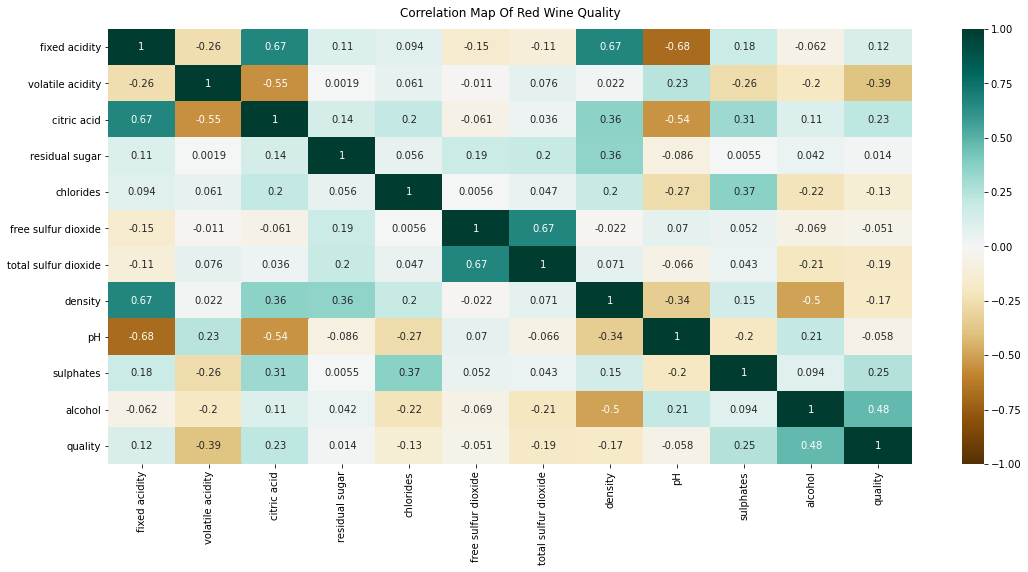

In [7]:
plt.figure(figsize=(18, 8))
sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

# PreProcessing

In [8]:
redwine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

If the quality value > 6, it means the quality is good and I define it as 1.

If the quality value < 6, it means the quality is bad and I define it as 0.

In [9]:
redwine['quality'] = np.where(redwine['quality'] > 6, 1, 0)
redwine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

From this actual data, there are more bad qualities than good ones. Also indicated that the data is imbalanced.

## Splitting Data

In [10]:
X = redwine.drop(['quality'], axis = 1)
y = redwine['quality']

In [11]:
X.shape

(1599, 11)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

I use 0.3 as default score for test_size and X.shape for random_state so the data will be devided equally.

## Find Best K-Score

In [13]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8979166666666667 Best K-Score 3


sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])

A large K value has benefits which include reducing the variance due to the noisy data, the side effect being developing a bias due to which the learner tends to ignore the smaller patterns which may have useful insights. The data indicates underfitting.

# Modeling

Define Model Using Best K-Score

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

### Cross Validation

In [18]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

pipe_knn_cv = model_evaluation(pipe_knn, 'roc_auc')

score_mean = [pipe_knn_cv.mean()]
score_std = [pipe_knn_cv.std()]
score_roc_auc = [roc_auc_score(y_test, pipe_knn.predict(X_test))]
method_name = ['K-Neighbors Classifier']
summary = pd.DataFrame({'method': method_name, 'mean score': score_mean,
                        'std score': score_std, 'roc auc score': score_roc_auc})
summary

,method,mean score,std score,roc auc score
0,K-Neighbors Classifier,0.794871,0.019318,0.765802


#### Now, see if the HyperParameter Tuning process can boost until getting the maximum score.

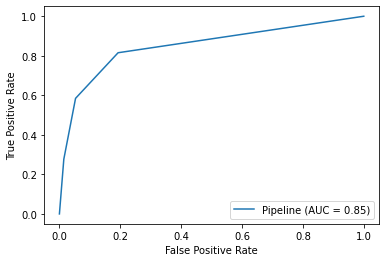

In [17]:
plot_roc_curve(pipe_knn, X_test, y_test)

# HyperParameter Tuning

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
estimator = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])

hyperparam_space = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'knn__leaf_size': [10, 20, 30, 40, 50],
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
                estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [10, 20, 30, 40, 50],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [20]:
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.8861649702794804
best param {'knn__leaf_size': 10, 'knn__n_neighbors': 17, 'knn__weights': 'distance'}


#### After HyperParameter Tuning, the best score is 0.88616, which getting higher. Leaf size is 10, N neighbors is 17, and Weights is distance. Let's compare the result.

# Before VS After Tuning Comparison

In [21]:
estimator.fit(X_train, y_train)
y_pred_estimator = estimator.predict(X_test)
print(classification_report(y_test, y_pred_estimator))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       415
           1       0.63      0.58      0.61        65

    accuracy                           0.90       480
   macro avg       0.78      0.77      0.77       480
weighted avg       0.89      0.90      0.90       480



In [22]:
grid.best_estimator_.fit(X_train, y_train)
y_pred_grid = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       415
           1       0.79      0.52      0.63        65

    accuracy                           0.92       480
   macro avg       0.86      0.75      0.79       480
weighted avg       0.91      0.92      0.91       480



In [23]:
score_list = [roc_auc_score(y_test, y_pred_estimator), roc_auc_score(y_test, y_pred_grid)]
accuracy = [score, accuracy_score(y_test, y_pred_grid)]
method_name = ['K-Neighbors Classifier Before Tuning', 'K-Neighbors Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'roc auc score': score_list,
    'accuracy score': accuracy
})
best_summary

,method,roc auc score,accuracy score
0,K-Neighbors Classifier Before Tuning,0.765802,0.897917
1,K-Neighbors Classifier After Tuning,0.750695,0.916667


From this score, I see that the roc auc score after tuning is getting lower, even the accuracy score is getting higher. First thing, the data is imbalanced, so it could cause this, and the second thing is the data indicates underfitting training dataset.